# Exercise 5

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [6]:
tokenizer = Tokenizer()

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

1. Create the LSTM model

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.15))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='relu'))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           337500    
                                                                 
 bidirectional (Bidirection  (None, 10, 300)           301200    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 300)               541200    
 onal)                                                           
                                                                 
 dense (Dense)               (None, 3375)              1015875   
                                                                 
 dense_1 (Dense)             (None, 3375)              1

In [12]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 12ms/step - loss: 0.4952 - accuracy: 0.8460
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 0.4792 - accuracy: 0.8508
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 0.4697 - accuracy: 0.8527
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 0.4747 - accuracy: 0.8512
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 0.4867 - accuracy: 0.8482
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 0.5150 - accuracy: 0.8430
Epoch 7/100
484/484 [==============================] - 6s 13ms/step - loss: 0.5042 - accuracy: 0.8445
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 0.4784 - accuracy: 0.8501
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 0.4818 - accuracy: 0.8491
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 0.472

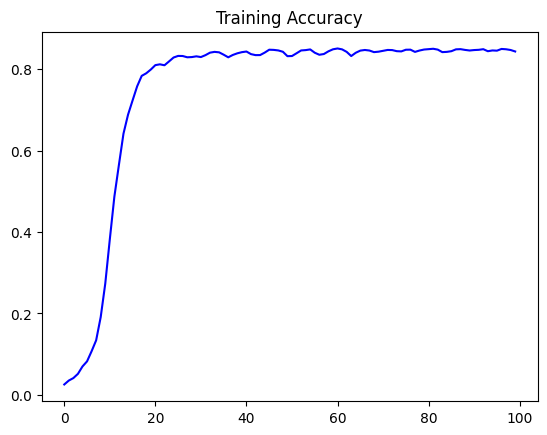

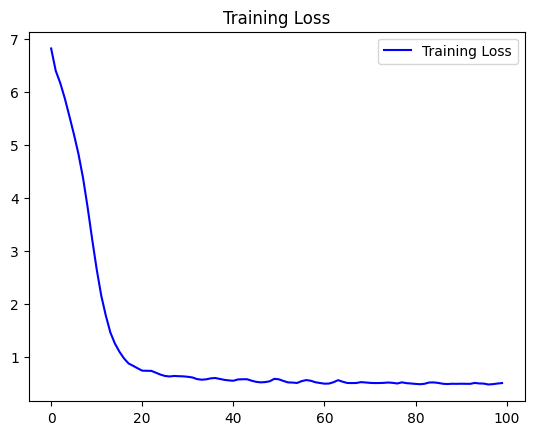

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [13]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis = -1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 20ms/step
Help me Obi Wan Kenobi, you're my only hope praise all shine bright in your worth do define a story of thy days are ghost to me resort to lie on that dyer's boat can bear thine eyes i abide new hindmost despised rent to say in it not call not love with that adieu with true about begin torn luck luck shows it to my love's breath the purple pride torn up to me in love doth nothing alone by thy 'will' doth cross be 'will' to be feeding of that word doth grow doth know my friend to be the devil of you master cruel i love
